# Predict Pet Adoption Status Dataset – Creating a Predictive Model 

The Pet Adoption Dataset provides a comprehensive look into various factors that can influence the likelihood of a pet being adopted from a shelter. This dataset includes detailed information about pets available for adoption, covering various characteristics and attributes.

## Features
|Column|Description|
|-------|------------|
|PetID|Unique identifier for each pet|
|PetType|Type of pet (e.g., Dog, Cat, Bird, Rabbit)|
|Breed|Specific breed of the pet|
|AgeMonths| Age of the pet in months|
|Color| Color of the pet|
|Size| Size category of the pet (Small, Medium, Large)|
|WeightKg| Weight of the pet in kilograms|
|Vaccinated| Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated)|
|HealthCondition| Health condition of the pet (0 - Healthy, 1 - Medical condition)|
|TimeInShelterDays| Duration the pet has been in the shelter (days)|
|AdoptionFee| Adoption fee charged for the pet (in dollars)|
|PreviousOwner| Whether the pet had a previous owner (0 - No, 1 - Yes)|
|AdoptionLikelihood| Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely)|

# 1. Libraries and data 

In [1]:
pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 71.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn import metrics
from sklearn import model_selection
from sklearn import pipeline

from sklearn import tree
from sklearn import linear_model
from sklearn import ensemble

# Feature Engineering
from feature_engine import imputation
from feature_engine import encoding

# Notebook Configs
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
my_palette = sns.color_palette(["#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF", "#ADE8F4", "#CAF0F8"])
sns.set_palette(my_palette)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [3]:
df = pd.read_csv("/kaggle/input/predict-pet-adoption-status-dataset/pet_adoption_data.csv")

# 2. Data Structure 

In [4]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [5]:
df.tail()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0
2006,2506,Rabbit,Rabbit,126,White,Medium,18.519788,1,0,10,267,1,0


In [6]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"with {len(df.select_dtypes(exclude = 'number').columns.to_list())} categorical features")
print(f"and {len(df.select_dtypes(include = 'number').columns.to_list())} numerical features")

The dataset has 2007 rows and 13 columns
with 4 categorical features
and 9 numerical features


In [7]:
print(f"The dataset has {df.duplicated().sum()} duplicated rows")

The dataset has 0 duplicated rows


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [9]:
df.drop(columns = 'PetID', axis = 1).describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
AgeMonths,2007.0,92.2795,52.1484,1.0000,48.0000,94.0000,138.0000,179.0000
WeightKg,2007.0,15.7058,8.3277,1.0182,8.7304,15.9254,22.7372,29.9956
Vaccinated,2007.0,0.7010,0.4579,0.0000,0.0000,1.0000,1.0000,1.0000
HealthCondition,2007.0,0.1963,0.3973,0.0000,0.0000,0.0000,0.0000,1.0000
TimeInShelterDays,2007.0,43.9741,25.7403,1.0000,21.0000,45.0000,66.0000,89.0000
AdoptionFee,2007.0,249.1420,142.8870,0.0000,127.0000,242.0000,375.0000,499.0000
PreviousOwner,2007.0,0.3019,0.4592,0.0000,0.0000,0.0000,1.0000,1.0000
AdoptionLikelihood,2007.0,0.3284,0.4697,0.0000,0.0000,0.0000,1.0000,1.0000


The data does not have any apparent discrepancies, the mean and median of the numerical variables are very close, indicating the absence of outliers.

# 3. EDA 

In [10]:
# I will create a new DataFrame where there's only adopted pets

adopted = df[df['AdoptionLikelihood'] == 1].copy()
adopted.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
7,507,Cat,Siamese,13,Orange,Large,7.252683,1,0,3,137,0,1
11,511,Rabbit,Rabbit,5,White,Small,29.078056,1,0,60,462,0,1
14,514,Cat,Persian,160,Brown,Medium,6.303899,1,0,11,404,0,1
17,517,Cat,Persian,50,White,Medium,28.982929,1,0,13,109,0,1
22,522,Dog,Labrador,3,Gray,Large,15.576273,1,0,50,369,1,1


## 3.1. PetType

In [11]:
df.groupby("PetType").agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)

,PetType,Count
2,Dog,522
1,Cat,505
3,Rabbit,493
0,Bird,487


In [12]:
ptype = adopted.groupby("PetType").agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)
ptype

,PetType,Count
2,Dog,242
0,Bird,147
1,Cat,145
3,Rabbit,125


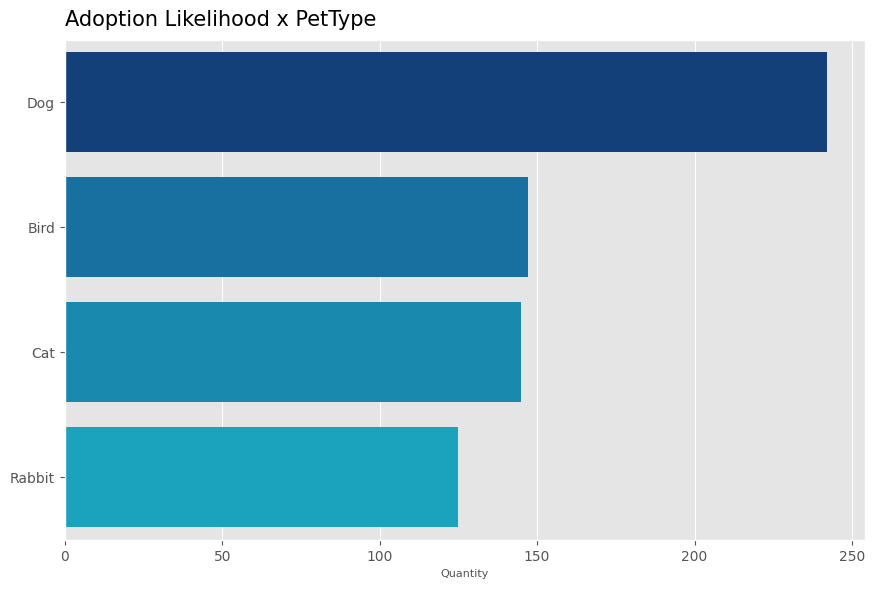

In [13]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(ptype, x = 'Count', y = 'PetType')
ax.set_title("Adoption Likelihood x PetType", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Quantity", fontsize = 8)
ax.set_ylabel("")
plt.show()

With a larger volume of animals in shelters, dogs are also the most adopted pets.

## 3.2. Breed

In [14]:
df.groupby(["Breed", "PetType"]).agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)

,Breed,PetType,Count
5,Rabbit,Rabbit,493
2,Parakeet,Bird,487
6,Siamese,Cat,253
3,Persian,Cat,252
1,Labrador,Dog,193
4,Poodle,Dog,167
0,Golden Retriever,Dog,162


There is no distinction between rabbit breeds, and among birds, only parakeets are available.

In [15]:
breed = adopted.groupby(["Breed", "PetType"]).agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)
breed

,Breed,PetType,Count
2,Parakeet,Bird,147
1,Labrador,Dog,139
5,Rabbit,Rabbit,125
6,Siamese,Cat,78
3,Persian,Cat,67
4,Poodle,Dog,56
0,Golden Retriever,Dog,47


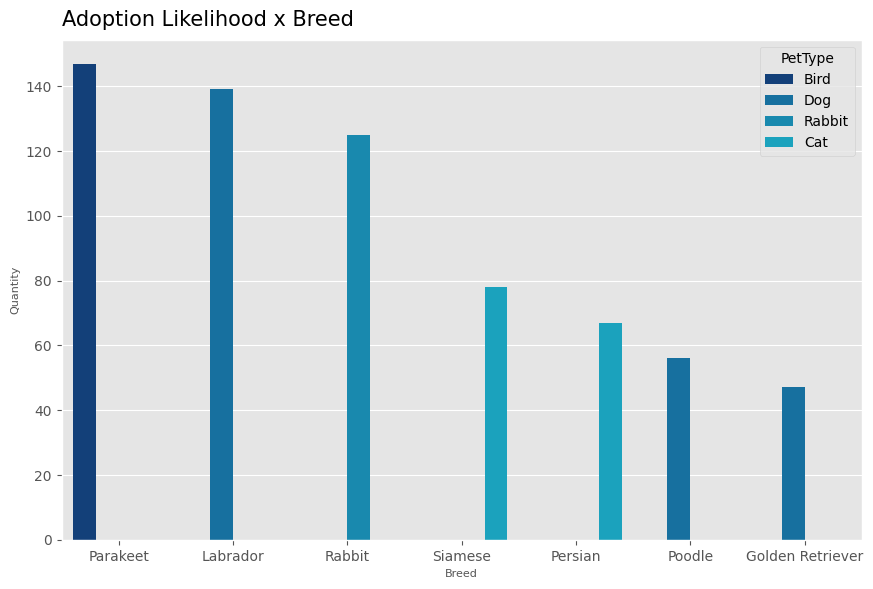

In [16]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(breed, y = 'Count', x = 'Breed', hue = 'PetType')
ax.set_title("Adoption Likelihood x Breed", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Breed", fontsize = 8)
ax.set_ylabel("Quantity", fontsize = 8)
plt.legend(title = 'PetType')
plt.show()

Among the types of pets with defined breeds, Labrador retrievers are the most adopted dogs. Labrador Retrievers are popular for their friendly, intelligent, and trainable nature.

## 3.3 AgeMonths

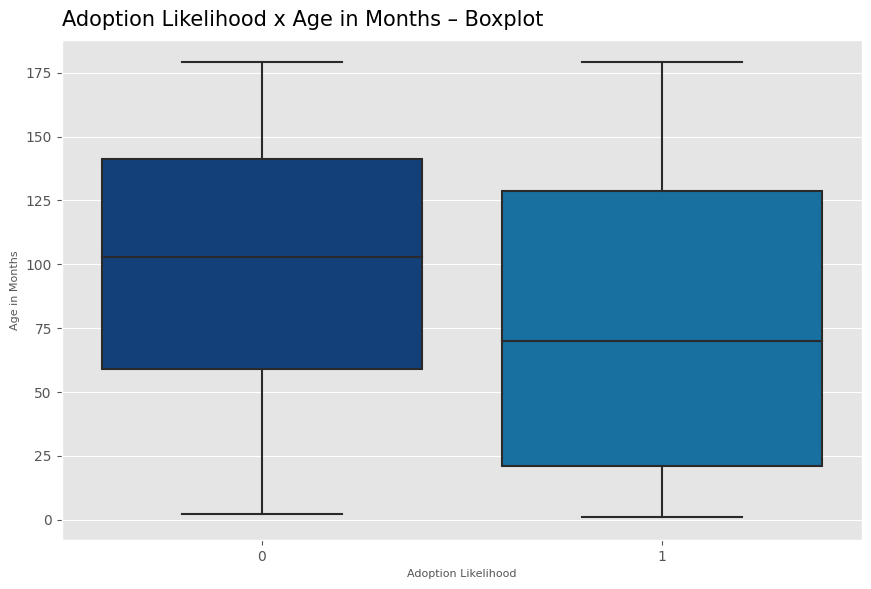

In [17]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, y = 'AgeMonths', x = 'AdoptionLikelihood', palette=my_palette)
ax.set_title('Adoption Likelihood x Age in Months – Boxplot', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Adoption Likelihood', fontsize = 8)
ax.set_ylabel('Age in Months', fontsize = 8)
plt.show()

Older animals are less likely to be adopted, with health being the most important criterion when choosing an animal for adoption.

## 3.4. Color

In [18]:
df.groupby(["Color"]).agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)

,Color,Count
4,White,420
3,Orange,409
2,Gray,400
0,Black,395
1,Brown,383


In [19]:
color = adopted.groupby(["Color"]).agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)
color

,Color,Count
3,Orange,142
2,Gray,137
0,Black,135
1,Brown,125
4,White,120


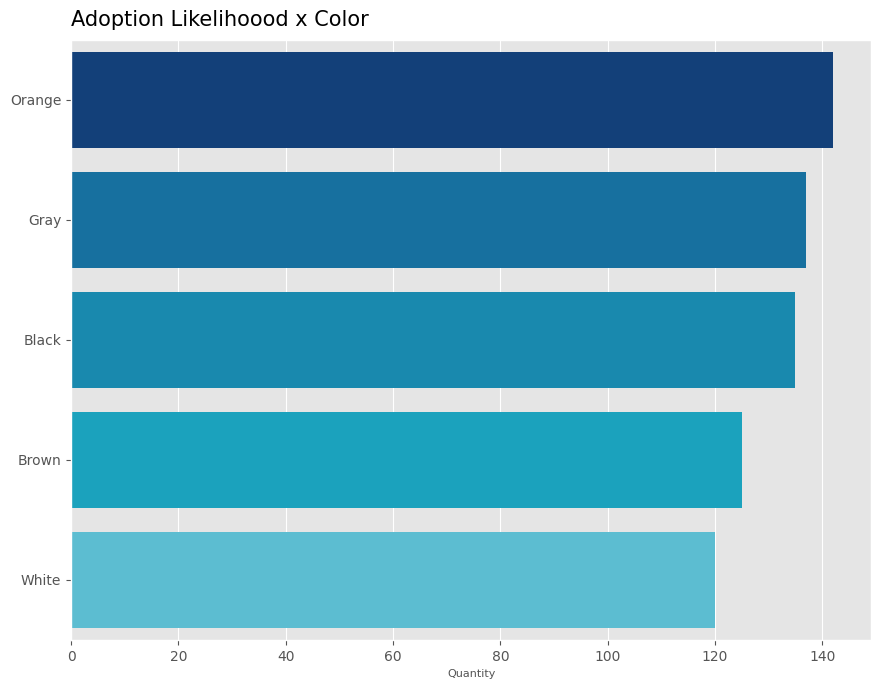

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(color, y = 'Color', x = 'Count')
ax.set_title('Adoption Likelihoood x Color', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Quantity', fontsize = 8)
ax.set_ylabel('')
plt.show()

## 3.5. Size

In [21]:
df.groupby("Size").agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)

,Size,Count
1,Medium,714
2,Small,663
0,Large,630


In [22]:
size = adopted.groupby("Size").agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)
size

,Size,Count
1,Medium,445
2,Small,117
0,Large,97


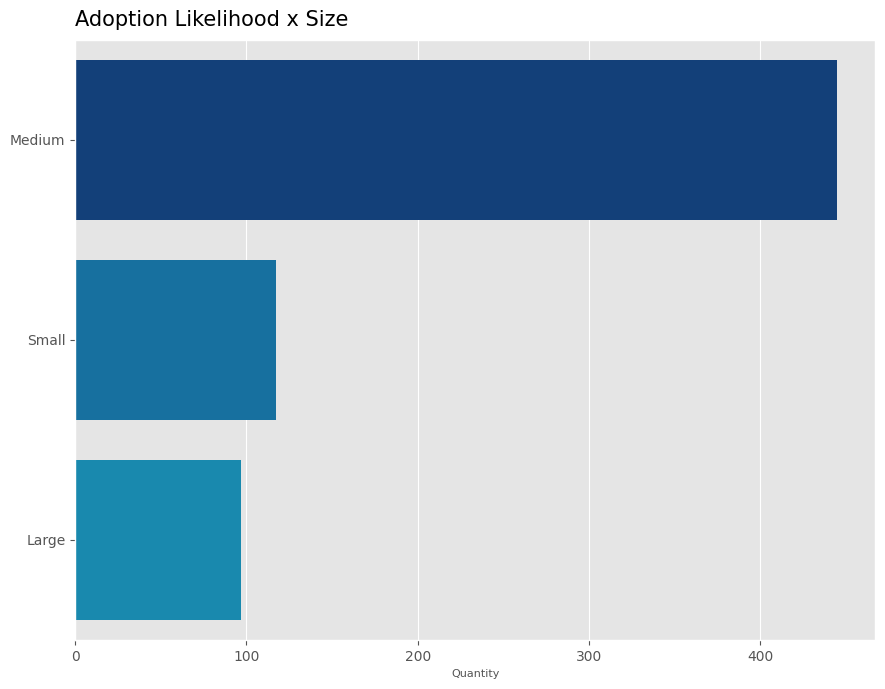

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(size, x = 'Count', y = 'Size')
ax.set_title('Adoption Likelihood x Size', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Quantity', fontsize = 8)
ax.set_ylabel('')
plt.show()

Medium-sized animals are the majority both in number in shelters and in adoptions. Larger animals are the least adopted. 

- The popularity of medium-sized animals for adoption may be due to their suitability for a variety of living spaces and lifestyles.
- Larger animals may require more space, exercise, and training, which can be a deterrent for some potential adopters.

Let's take a closer look by type of animal.

In [24]:
size_a = adopted.groupby(["Size", "PetType"]).agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)
size_a

,Size,PetType,Count
6,Medium,Dog,133
5,Medium,Cat,111
4,Medium,Bird,110
7,Medium,Rabbit,91
10,Small,Dog,60
2,Large,Dog,49
8,Small,Bird,21
11,Small,Rabbit,21
1,Large,Cat,19
0,Large,Bird,16


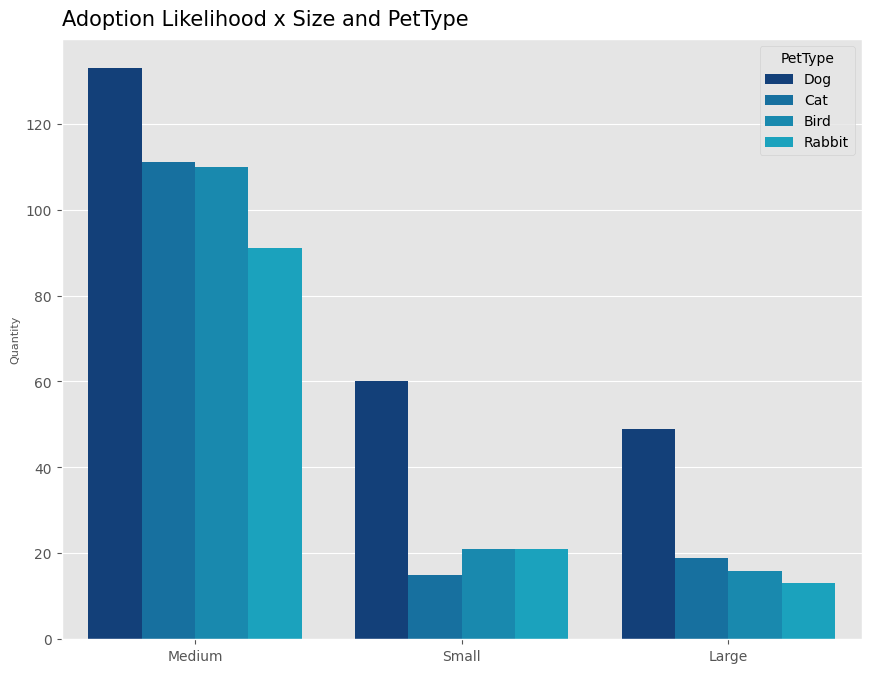

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(size_a, x = 'Size', y = 'Count', hue = 'PetType')
ax.set_title('Adoption Likelihood x Size and PetType', loc = 'left', fontsize = 15, pad = 10)
ax.set_ylabel('Quantity', fontsize = 8)
ax.set_xlabel('')
plt.legend(title = 'PetType')
plt.show()

## 3.6. WeightKg

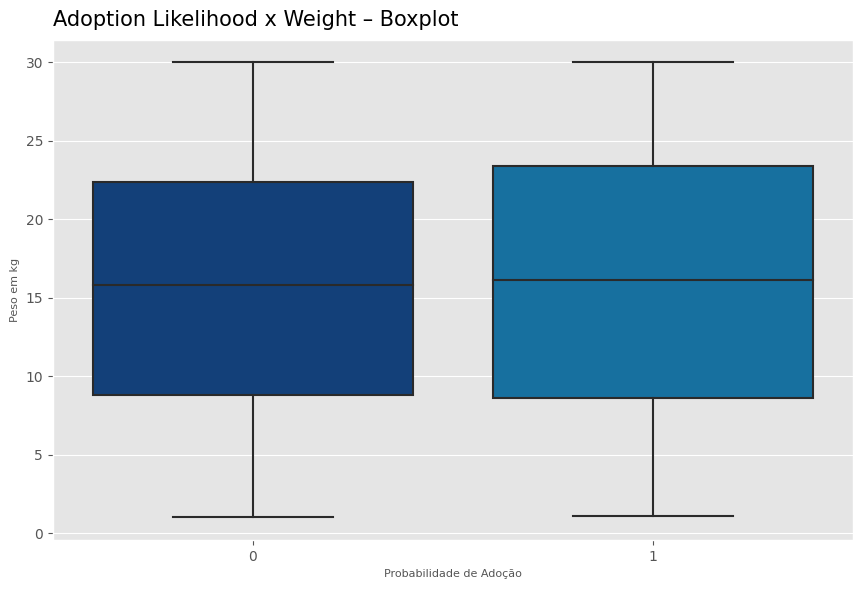

In [26]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, y = 'WeightKg', x = 'AdoptionLikelihood', palette = my_palette)
ax.set_title('Adoption Likelihood x Weight – Boxplot', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Probabilidade de Adoção', fontsize = 8)
ax.set_ylabel('Peso em kg', fontsize = 8)
plt.show()

An animal's weight can be an indicator of good health. It is important to consult with a veterinarian to get an assessment of an animal's health before adopting it, a healthy weight for an animal can vary depending on its breed, age, and sex.

## 3.7. Vaccinated

In [27]:
df.groupby('Vaccinated').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()

,Vaccinated,Count
0,0,600
1,1,1407


In [28]:
vax = adopted.groupby('Vaccinated').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()
vax

,Vaccinated,Count
0,0,67
1,1,592


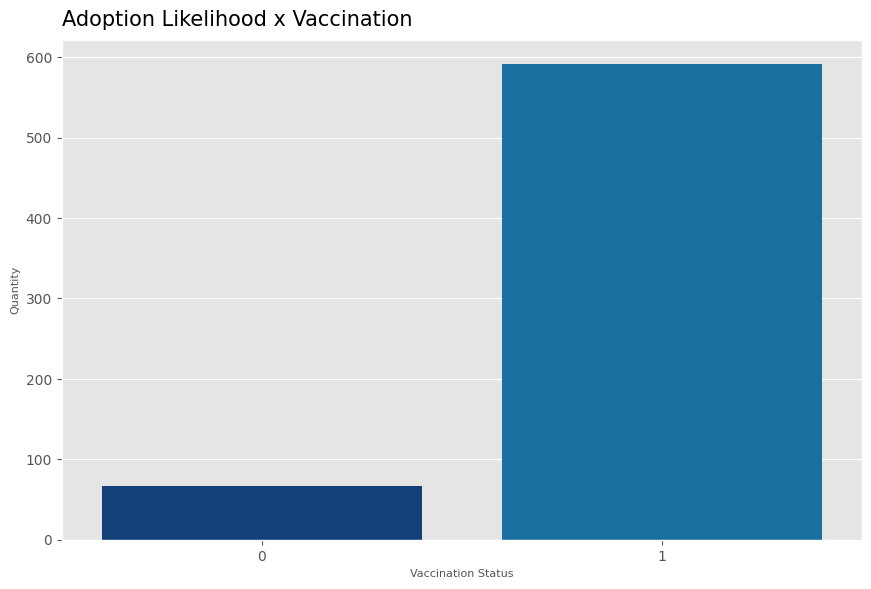

In [29]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(vax, x = 'Vaccinated', y = 'Count')
ax.set_title('Adoption Likelihood x Vaccination', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Vaccination Status', fontsize = 8)
ax.set_ylabel('Quantity', fontsize = 8)
plt.show()

Health has been the most important factor observed during this study, and vaccination is one of the most defining aspects of an animal's health, vaccination is essential for preventing various infectious diseases that can harm animals, some of which can be fatal.

## 3.8. HealthCondition

In [30]:
df.groupby('HealthCondition').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()

,HealthCondition,Count
0,0,1613
1,1,394


In [31]:
health = adopted.groupby('HealthCondition').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()
health

,HealthCondition,Count
0,0,621
1,1,38


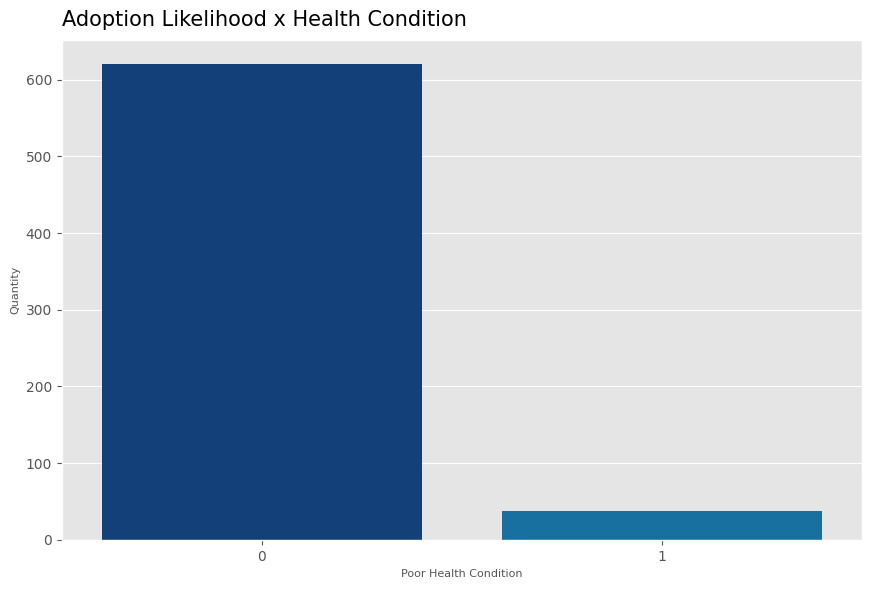

In [32]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(health, x = 'HealthCondition', y = 'Count')
ax.set_title('Adoption Likelihood x Health Condition', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Poor Health Condition', fontsize = 8)
ax.set_ylabel('Quantity', fontsize = 8)
plt.show()

Individuals who adopt sick pets often have a strong passion for animals and are willing to invest the time, resources, and expertise necessary to provide the animals with the care they need. The low adoption rate of sick pets may be due to concerns about the animals' medical expenses, potential behavioral issues, and the emotional toll of caring for an unwell animal.

## 3.9. TimeInShelterDays

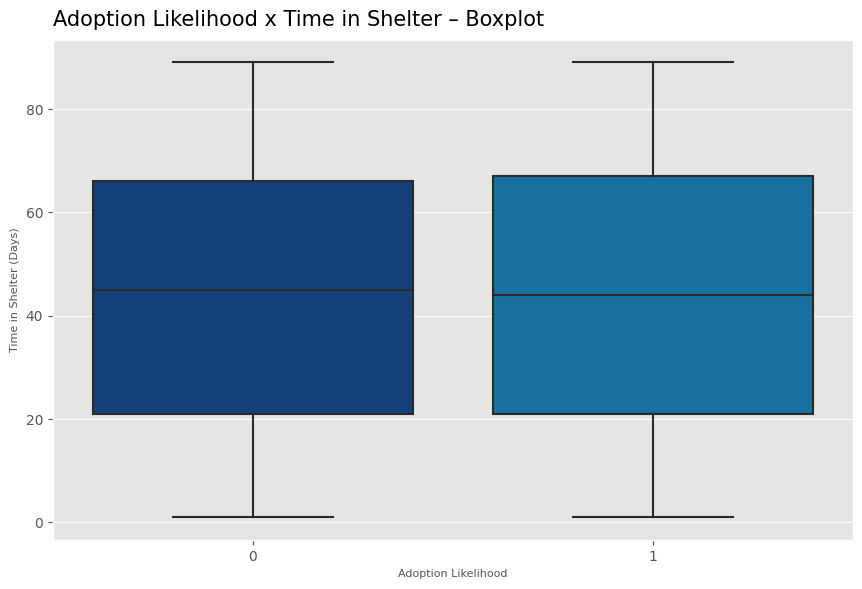

In [33]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, x = 'AdoptionLikelihood', y = 'TimeInShelterDays', palette = my_palette)
ax.set_title('Adoption Likelihood x Time in Shelter – Boxplot', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Adoption Likelihood', fontsize = 8)
ax.set_ylabel('Time in Shelter (Days)', fontsize = 8)
plt.show()

The difference is small, but animals with more time spent in shelters have a higher probability of adoption. 

## 3.10. AdoptionFee

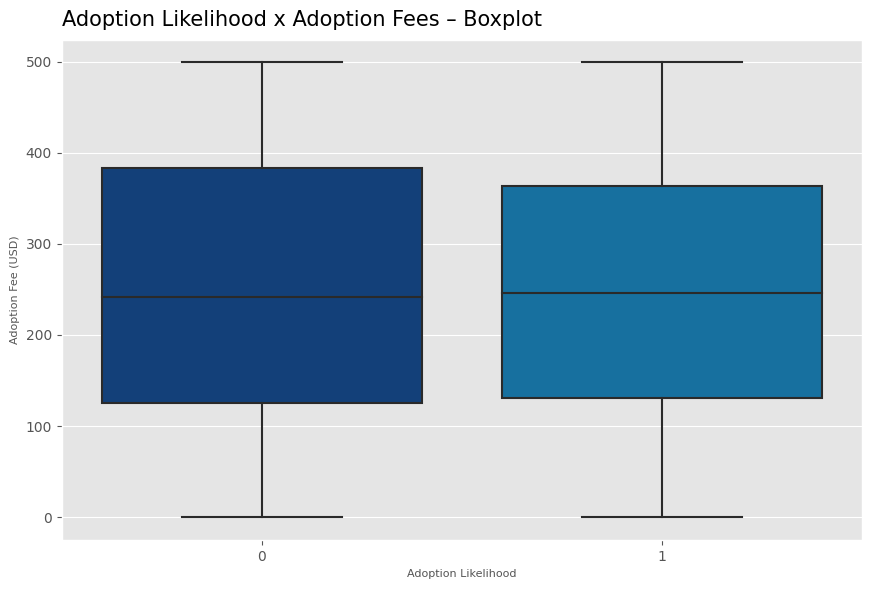

In [34]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, x = 'AdoptionLikelihood', y = 'AdoptionFee', palette = my_palette)
ax.set_title('Adoption Likelihood x Adoption Fees – Boxplot', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Adoption Likelihood', fontsize = 8)
ax.set_ylabel('Adoption Fee (USD)', fontsize = 8)
plt.show()

## 3.11. PreviousOwner

In [35]:
df.groupby('PreviousOwner').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()

,PreviousOwner,Count
0,0,1401
1,1,606


In [36]:
owner = adopted.groupby('PreviousOwner').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()
owner

,PreviousOwner,Count
0,0,470
1,1,189


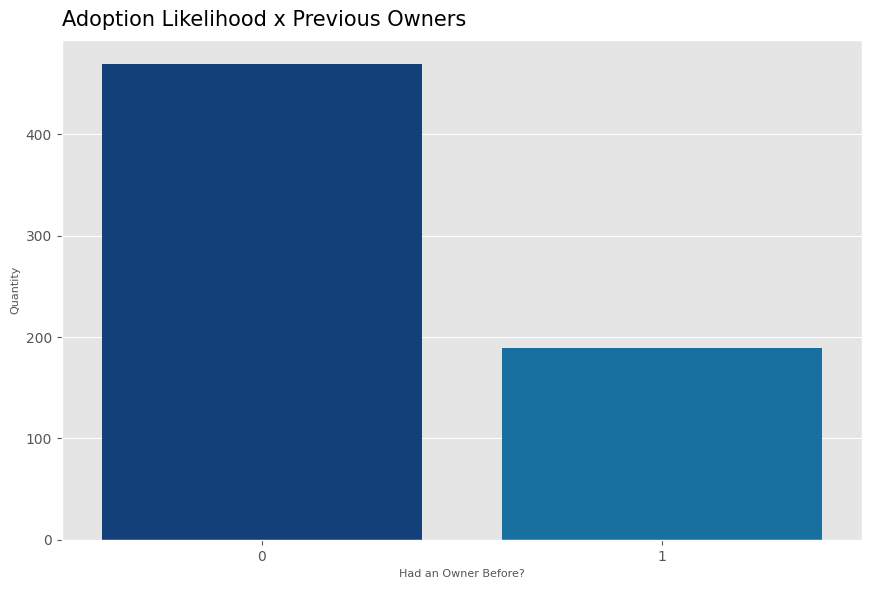

In [37]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(owner, x = 'PreviousOwner', y = 'Count')
ax.set_title('Adoption Likelihood x Previous Owners', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Had an Owner Before?', fontsize = 8)
ax.set_ylabel('Quantity', fontsize = 8)
plt.show()

## 3.12. EDA Conclusions

#### Key Factors Influencing Pet Adoption


- **Health**: Health is a top priority for potential adopters, encompassing aspects like vaccination status, overall health history, and any pre-existing medical conditions.

- **Size and Type**: Medium-sized animals, particularly dogs, tend to have higher adoption rates. Surprisingly, birds are also quite popular, often in a close tie with cats.

- **Color**: White-colored animals may have lower adoption rates, possibly due to perceived challenges in maintaining cleanliness.

- **Time in Shelter**: The length of time an animal has spent at a shelter doesn't seem to significantly impact adoption chances.

Overall, a combination of factors influences pet adoption decisions, with health, size, type, and individual preferences playing significant roles. Responsible adoption practices and understanding the animal's needs are crucial for ensuring successful placements.

# 4. Predictive Model

## 4.1. Pre-processing

In [38]:
features = df.columns.to_list()[1:-1]
target = 'AdoptionLikelihood'

In [39]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[features],
                                                                    df[target],
                                                                    test_size=0.20,
                                                                    random_state=42,
                                                                    stratify=df[target])

print("Mean Adoption Likelihood in Train: ", y_train.mean())
print("Mean Adoption Likelihood in Test ", y_test.mean())

Mean Adoption Likelihood in Train:  0.3283489096573209
Mean Adoption Likelihood in Test  0.3283582089552239


In [40]:
cat_features = X_test.select_dtypes(exclude = 'number').columns.to_list()
num_features = X_test.select_dtypes(include = 'number').columns.to_list()

In [41]:
onehot = encoding.OneHotEncoder(variables=cat_features)
num_imputer = imputation.MeanMedianImputer(imputation_method = 'median', variables = num_features)
cat_imputer = imputation.CategoricalImputer(imputation_method = 'frequent', variables = cat_features)

## 4.2. Random Forest

In [42]:
model = ensemble.RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 150, 250, 500],
    'min_samples_leaf': [10, 20, 30, 50, 100]
}

grid = model_selection.GridSearchCV(model, 
                                    param_grid = params,
                                    n_jobs=-1,
                                    cv = 5,
                                    scoring = "roc_auc")

rf = pipeline.Pipeline([
    ('imp_1', num_imputer),
    ('imp_2', cat_imputer),
    ('ohe', onehot),
    ('model', grid)
])

rf.fit(X_train, y_train)

Pipeline(steps=[('imp_1',
                 MeanMedianImputer(variables=['AgeMonths', 'WeightKg',
                                              'Vaccinated', 'HealthCondition',
                                              'TimeInShelterDays',
                                              'AdoptionFee',
                                              'PreviousOwner'])),
                ('imp_2',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PetType', 'Breed', 'Color',
                                               'Size'])),
                ('ohe',
                 OneHotEncoder(variables=['PetType', 'Breed', 'Color',
                                          'Size'])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'min_samples_leaf': [10, 20, 30, 50,
                                                               100],
                                          'n_estimators': [100, 150, 250, 500]},
                              scoring='roc_auc'))])

In [43]:
y_train_predict = rf.predict(X_train)
y_train_proba = rf.predict_proba(X_train)[:,1]

y_test_predict = rf.predict(X_test)
y_test_proba = rf.predict_proba(X_test)[:,1]

In [44]:
acc_train = metrics.accuracy_score(y_train, y_train_predict)
acc_test = metrics.accuracy_score(y_test, y_test_predict)
print(f"Accuracy in Train: {acc_train}")
print(f"Accuracy in Test: {acc_test}")

auc_train = metrics.roc_auc_score(y_train, y_train_proba)
auc_test = metrics.roc_auc_score(y_test, y_test_proba)
print(f"AUC in Train: {auc_train}")
print(f"AUC in Test: {auc_test}")

acc_diff = (acc_train - acc_test) * 100
auc_diff = (auc_train - auc_test) * 100
print(f"{round(acc_diff, 4)}% difference between Train and Test Accuracy")
print(f"{round(auc_diff, 4)}% difference between Train and Test AUC")

Accuracy in Train: 0.9495327102803738
Accuracy in Test: 0.9129353233830846
AUC in Train: 0.9668213326386274
AUC in Test: 0.9207912457912458
3.6597% difference between Train and Test Accuracy
4.603% difference between Train and Test AUC


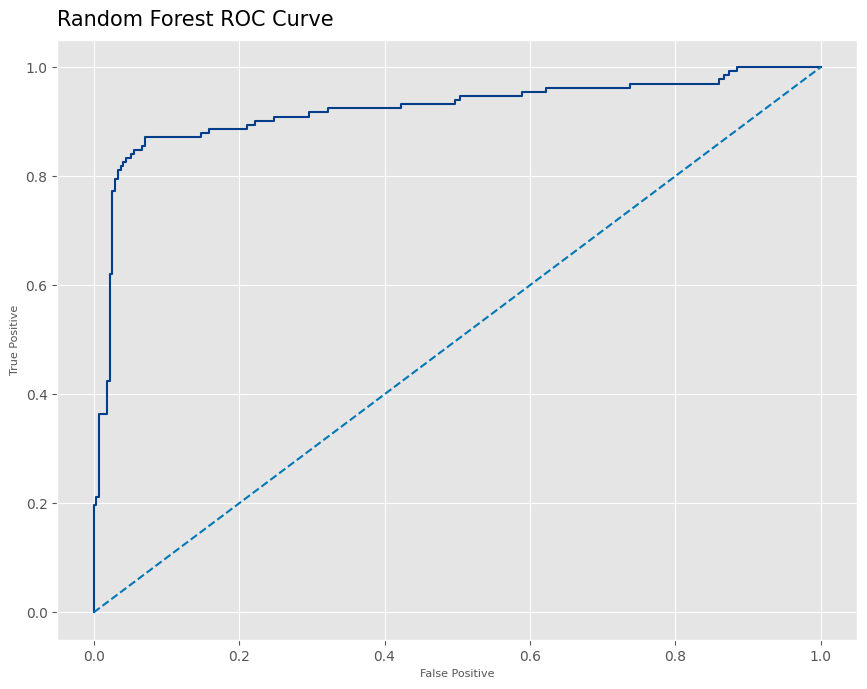

In [45]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

roc_curve = metrics.roc_curve(y_test, y_test_proba)
plt.plot(roc_curve[0], roc_curve[1] )
plt.grid(True)
plt.plot([0,1], [0,1], '--')
ax.set_title('Random Forest ROC Curve', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('False Positive', fontsize = 8)
ax.set_ylabel('True Positive', fontsize = 8)
plt.show()

## 4.3. DecisionTree

In [46]:
model = tree.DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = model_selection.GridSearchCV(model, 
                                    param_grid = params,
                                    n_jobs=-1,
                                    cv = 5,
                                    scoring = "roc_auc")

dt = pipeline.Pipeline([
    ('imp_1', num_imputer),
    ('imp_2', cat_imputer),
    ('ohe', onehot),
    ('model', grid)
])

dt.fit(X_train, y_train)

Pipeline(steps=[('imp_1',
                 MeanMedianImputer(variables=['AgeMonths', 'WeightKg',
                                              'Vaccinated', 'HealthCondition',
                                              'TimeInShelterDays',
                                              'AdoptionFee',
                                              'PreviousOwner'])),
                ('imp_2',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PetType', 'Breed', 'Color',
                                               'Size'])),
                ('ohe',
                 OneHotEncoder(variables=['PetType', 'Breed', 'Color',
                                          'Size'])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [None, 10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]},
                              scoring='roc_auc'))])

In [47]:
y_train_predict = dt.predict(X_train)
y_train_proba = dt.predict_proba(X_train)[:,1]

y_test_predict = dt.predict(X_test)
y_test_proba = dt.predict_proba(X_test)[:,1]

In [48]:
acc_train = metrics.accuracy_score(y_train, y_train_predict)
acc_test = metrics.accuracy_score(y_test, y_test_predict)
print(f"Accuracy in Train: {acc_train}")
print(f"Accuracy in Test: {acc_test}")

auc_train = metrics.roc_auc_score(y_train, y_train_proba)
auc_test = metrics.roc_auc_score(y_test, y_test_proba)
print(f"AUC in Train: {auc_train}")
print(f"AUC in Test: {auc_test}")

acc_diff = (acc_train - acc_test) * 100
auc_diff = (auc_train - auc_test) * 100
print(f"{round(acc_diff, 4)}% difference between Train and Test Accuracy")
print(f"{round(auc_diff, 4)}% difference between Train and Test AUC")

Accuracy in Train: 0.9514018691588785
Accuracy in Test: 0.9253731343283582
AUC in Train: 0.9856664073253935
AUC in Test: 0.9148849607182941
2.6029% difference between Train and Test Accuracy
7.0781% difference between Train and Test AUC


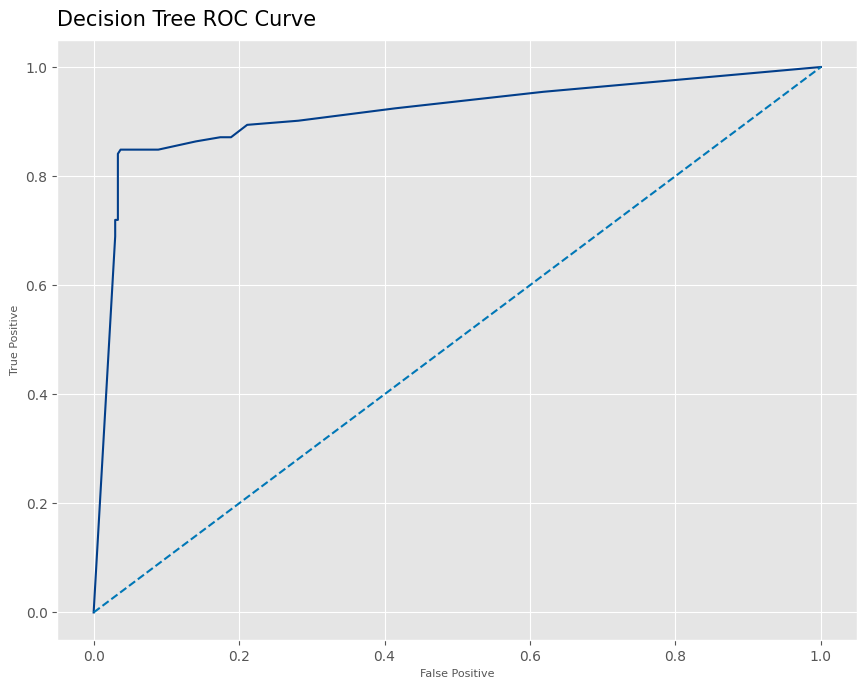

In [49]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

roc_curve = metrics.roc_curve(y_test, y_test_proba)
plt.plot(roc_curve[0], roc_curve[1] )
plt.grid(True)
plt.plot([0,1], [0,1], '--')
ax.set_title('Decision Tree ROC Curve', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('False Positive', fontsize = 8)
ax.set_ylabel('True Positive', fontsize = 8)
plt.show()

## 4.4. Logistic Regression

In [50]:
model = linear_model.LogisticRegression(max_iter=1000, random_state=42)

params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag']
}

grid = model_selection.GridSearchCV(model, 
                                    param_grid = params,
                                    n_jobs=-1,
                                    cv = 5,
                                    scoring = "roc_auc")

lr = pipeline.Pipeline([
    ('imp_1', num_imputer),
    ('imp_2', cat_imputer),
    ('ohe', onehot),
    ('model', grid)
])

lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Pipeline(steps=[('imp_1',
                 MeanMedianImputer(variables=['AgeMonths', 'WeightKg',
                                              'Vaccinated', 'HealthCondition',
                                              'TimeInShelterDays',
                                              'AdoptionFee',
                                              'PreviousOwner'])),
                ('imp_2',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PetType', 'Breed', 'Color',
                                               'Size'])),
                ('ohe',
                 OneHotEncoder(variables=['PetType', 'Breed', 'Color',
                                          'Size'])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(max_iter=1000,
                                                           random_state=42),
                              n_jobs=-1,
                              param_grid={'C': [0.01, 0.1, 1, 10, 100],
                                          'solver': ['newton-cg', 'lbfgs',
                                                     'sag']},
                              scoring='roc_auc'))])

In [51]:
y_train_predict = lr.predict(X_train)
y_train_proba = lr.predict_proba(X_train)[:,1]

y_test_predict = lr.predict(X_test)
y_test_proba = lr.predict_proba(X_test)[:,1]

In [52]:
acc_train = metrics.accuracy_score(y_train, y_train_predict)
acc_test = metrics.accuracy_score(y_test, y_test_predict)
print(f"Accuracy in Train: {acc_train}")
print(f"Accuracy in Test: {acc_test}")

auc_train = metrics.roc_auc_score(y_train, y_train_proba)
auc_test = metrics.roc_auc_score(y_test, y_test_proba)
print(f"AUC in Train: {auc_train}")
print(f"AUC in Test: {auc_test}")

acc_diff = (acc_train - acc_test) * 100
auc_diff = (auc_train - auc_test) * 100
print(f"{round(acc_diff, 4)}% difference between Train and Test Accuracy")
print(f"{round(auc_diff, 4)}% difference between Train and Test AUC")

Accuracy in Train: 0.9158878504672897
Accuracy in Test: 0.8855721393034826
AUC in Train: 0.9342851510105509
AUC in Test: 0.9224466891133559
3.0316% difference between Train and Test Accuracy
1.1838% difference between Train and Test AUC


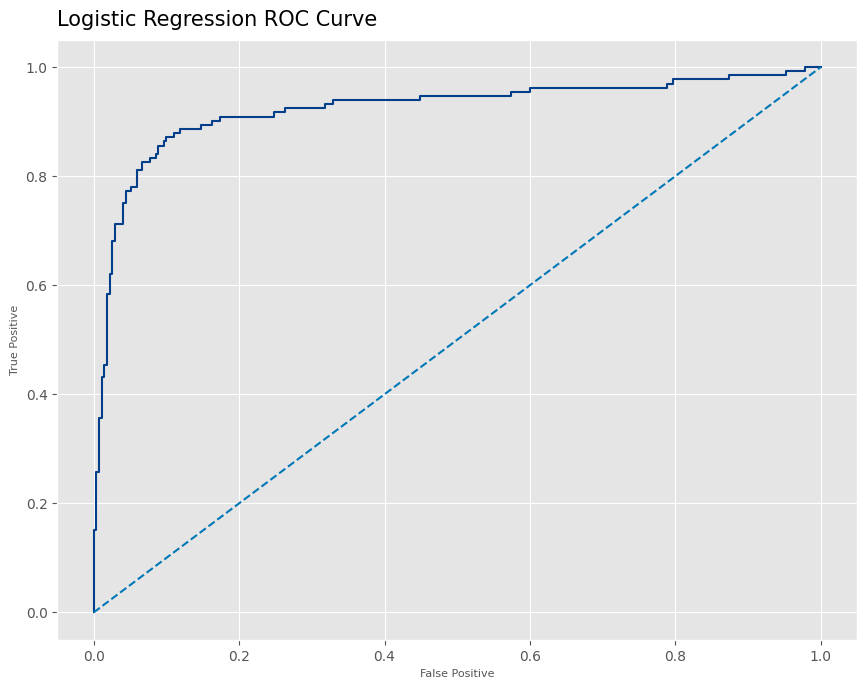

In [53]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0, 0, 1, 1])

roc_curve = metrics.roc_curve(y_test, y_test_proba)
plt.plot(roc_curve[0], roc_curve[1] )
plt.grid(True)
plt.plot([0,1], [0,1], '--')
ax.set_title('Logistic Regression ROC Curve', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('False Positive', fontsize = 8)
ax.set_ylabel('True Positive', fontsize = 8)
plt.show()

## 4.5. The Chosen Model

The model with best fit is the Logistic Regression due the smallest diference between train and test, and better adjustment.

![periquito](https://github.com/datalopes1/pet_adoption/blob/main/doc/img/dim-hou-ZAtcN0f9HJc-unsplash.jpg?raw=true)